In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
da=pd.read_csv("nhanes_2015_2016.csv")
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [3]:
da['RIAGENDR']=da['RIAGENDR'].replace({1:"Male",2:"Female"})
da['SMQ020']=da['SMQ020'].replace({2:"No",1:"Yes",9:np.nan,9:np.nan})
dx=da[['RIAGENDR','SMQ020']].dropna()


In [5]:
cv=dx.groupby("RIAGENDR").agg({"SMQ020":[lambda x: np.mean(x=="Yes"),np.size]})
cv.columns=['Proportion',"Size"]
cv

,Proportion,Size
RIAGENDR,,
Female,0.304845,2972
Male,0.512886,2755


In [10]:
print("Calculation of CI for Male Proportion of Smokers using Manual Calculation with 95% confidence")
se_male=np.sqrt((cv.Proportion.Male*(1-cv.Proportion.Male))/cv.Size.Male)
t_stat=1.96
ci=(cv.Proportion.Male-t_stat*se_male,cv.Proportion.Male+t_stat*se_male)
l=np.round(ci[0],3)
r=np.round(ci[1],3)
ci=(l,r)
print(ci)
print("="*50)
print("Calculation of CI for Male Proportion of Smokers using Statmodels with 95% confidence")
ci=sm.stats.proportion_confint(cv.Proportion.Male*cv.Size.Male,cv.Size.Male)
l=np.round(ci[0],3)
r=np.round(ci[1],3)
ci=(l,r)
print(ci)
print("="*50)
print("Calculation of CI for Female Proportion of Smokers using ManualCalculation with 95% confidence")
se_female=np.sqrt((cv.Proportion.Female*(1-cv.Proportion.Female))/cv.Size.Female)
ci=(cv.Proportion.Female-t_stat*se_female,cv.Proportion.Female+t_stat*se_female)
l=np.round(ci[0],3)
r=np.round(ci[1],3)
ci=(l,r)
print(ci)
print("="*50)
print("Calculation of CI for Female Proportion of Smokers using Statmodels with 95% confidence")
ci=sm.stats.proportion_confint(cv.Proportion.Female*cv.Size.Female,cv.Size.Female)
l=np.round(ci[0],3)
r=np.round(ci[1],3)
ci=(l,r)
print(ci)

Calculation of CI for Male Proportion of Smokers using Manual Calculation with 95% confidence
(0.494, 0.532)
Calculation of CI for Male Proportion of Smokers using Statmodels with 95% confidence
(0.494, 0.532)
Calculation of CI for Female Proportion of Smokers using ManualCalculation with 95% confidence
(0.288, 0.321)
Calculation of CI for Female Proportion of Smokers using Statmodels with 95% confidence
(0.288, 0.321)


In [11]:
print("Calculation of CI for difference in porportions of Male Proportion of Smokers and Female Proportion of Smokers")
point_estimate=cv.Proportion.Male-cv.Proportion.Female
se=np.sqrt(se_male**2+se_female**2)
ci=(point_estimate-t_stat*se,point_estimate+t_stat*se)
l=np.round(ci[0],3)
r=np.round(ci[1],3)
ci=(l,r)
print(ci)

Calculation of CI for difference in porportions of Male Proportion of Smokers and Female Proportion of Smokers
(0.183, 0.233)


### Confidence intervals for subpopulations

Since smoking rates vary strongly with age, it might be more informative to stratify the data into homogeneous age bands and compare the proportions of female and male smokers within each age band.  We can also calculate the 95% confidence interval for this difference within each age band.  These data can be displayed as a plot, with the difference in proportions plotted as a curve.  The confidence intervals can then be used to construct a "confidence band" around the estimates.

            Female      Male
Age_Grp                     
(18, 30]  0.226601  0.349265
(30, 40]  0.286920  0.502183
(40, 50]  0.268924  0.448878
(50, 60]  0.421277  0.572687
(60, 70]  0.374150  0.654462
(70, 80]  0.324390  0.649254
            Female      Male
Age_Grp                     
(18, 30]  0.016964  0.020440
(30, 40]  0.020776  0.023363
(40, 50]  0.019790  0.024838
(50, 60]  0.022776  0.023217
(60, 70]  0.023043  0.022748
(70, 80]  0.023120  0.023801
Age_Grp
(18, 30]   -0.122664
(30, 40]   -0.215264
(40, 50]   -0.179954
(50, 60]   -0.151411
(60, 70]   -0.280313
(70, 80]   -0.324863
dtype: float64


<AxesSubplot:xlabel='Age_Grp'>

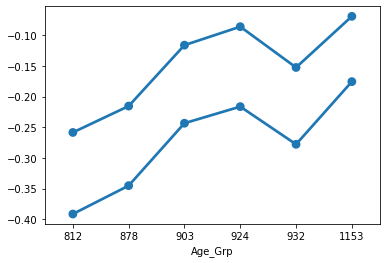

In [68]:
da['Age_Grp']=pd.cut(da['RIDAGEYR'],[18,30,40,50,60,70,80])
dx=da[["RIAGENDR","SMQ020","Age_Grp"]]
cv=dx.groupby(['Age_Grp','RIAGENDR']).agg({"SMQ020":[lambda x: np.mean(x=="Yes")]}).unstack()
cv.columns=['Female','Male']
print(cv)
d=dx.groupby(['Age_Grp','RIAGENDR']).agg({"SMQ020":[np.size]}).unstack()
d.columns=['Female','Male']
point_estimate=cv.Female-cv.Male
se=np.sqrt((cv*(1-cv))/d)
se_diff=np.sqrt(se.Female**2+se.Male**2)
point_estimate=cv.Female-cv.Male
print(se)
print(point_estimate)
sns.pointplot(x=da['Age_Grp'].value_counts(),y=point_estimate-2*se_diff)
sns.pointplot(x=da['Age_Grp'].value_counts(),y=point_estimate+2*se_diff)

<AxesSubplot:xlabel='Age_Grp', ylabel='Right_Value'>

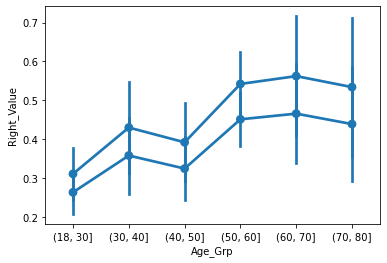

In [47]:
import seaborn as sns
sns.pointplot(x=v['Age_Grp'],y=v['Left_Value'])
sns.pointplot(x=v['Age_Grp'],y=v['Right_Value'])

In [51]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
pr = da.groupby(["agegrp", "RIAGENDR"]).agg({"SMQ020": lambda x: np.mean(x=="Yes")}).unstack()
pr.columns = ["Female", "Male"]

# The number of people for each calculated proportion
dn = da.groupby(["agegrp", "RIAGENDR"]).agg({"SMQ020": np.size}).unstack()
dn.columns = ["Female", "Male"]

# Standard errors for each proportion
se = np.sqrt(pr * (1 - pr) / dn)

# Standard error for the difference in female/male smoking rates in every age band
se_diff = np.sqrt(se.Female**2 + se.Male**2)

# Standard errors for the difference in smoking rates between genders, within age bands

# The difference in smoking rates between genders
pq = pr.Female - pr.Male

In [53]:
pr

,Female,Male
agegrp,,
"(18, 30]",0.226601,0.349265
"(30, 40]",0.286920,0.502183
"(40, 50]",0.268924,0.448878
"(50, 60]",0.421277,0.572687
"(60, 70]",0.374150,0.654462
"(70, 80]",0.324390,0.649254
